# Import Required Packages

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
df = pd.read_csv('train.csv')

In [115]:
#information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [116]:
print(df.apply(lambda x:sum(x.isnull())))
print(df.dtypes)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


# Cleaning the Missing values(placing appropriate values)

In [117]:
#Gender
df['Gender'].fillna('Male',inplace=True)
#Married
df['Married'].fillna('No',inplace=True)
#Dependents
#df['Dependents'] = df['Dependents'].map(lambda x: x.rstrip('+'))
df['Dependents'].fillna(0 , inplace=True)
#Self_Employed
df['Self_Employed'].fillna('No',inplace=True)

#LoanAmount
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

#Loan_Amount_Term
df['Loan_Amount_Term'].fillna(360,inplace=True)

#Credit_History
df['Credit_History'].fillna(0,inplace=True)


In [118]:
print(df.apply(lambda x:sum(x.isnull())))
print(df.dtypes)


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


# Convert all columns to (Int or Float) type

In [119]:
df['Gender']=df['Gender'].map({'Female':0,'Male':1}).astype(np.int)

In [120]:
df['Married']=df['Married'].map({'No':0, 'Yes':1}).astype(np.int)

In [121]:
df['Education']=df['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)

In [122]:
df['Self_Employed']=df['Self_Employed'].map({'No':0, 'Yes':1}).astype(np.int)

In [123]:
df['Loan_Status']=df['Loan_Status'].map({'N':0, 'Y':1}).astype(np.int)

In [124]:
df['Dependents'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
df['Dependents']=df['Dependents'].astype(np.int)

In [125]:
df['Property_Area']=df['Property_Area'].map({'Urban':0,'Semiurban':1,'Rural':2}).astype(np.int)

In [126]:
print(df.apply(lambda x:sum(x.isnull())))
print(df.dtypes)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object


# Divide data & target

In [127]:
x=df.iloc[ : ,1:-1]
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0


In [143]:
#target=Loan_Status
y=df['Loan_Status']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [129]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

                Loan_Status
Credit_History             
0.0                0.316547
1.0                0.795789


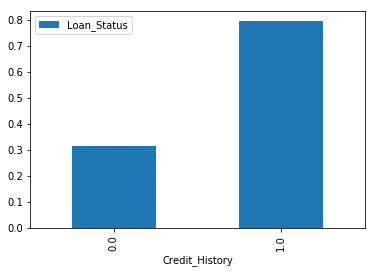

In [142]:
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'])
temp2.plot(kind='bar')
print(temp2)

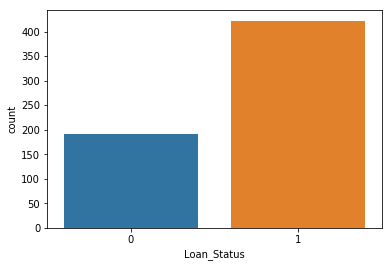

In [131]:
import seaborn as sb
sb.countplot(x='Loan_Status'  ,data=df)

# Train Data

In [132]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)#test size =20%(from the given data)

In [133]:
print(x_train.shape)   
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 11)
(123, 11)
(491,)
(123,)


# Prediction Models (Checking higher accuracy)

In [134]:
#Linear Regression
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [135]:
y_pred=linreg.predict(x_test)
from sklearn import metrics
import numpy as np
pred_accuracy=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(pred_accuracy)

0.3920223648032719


In [136]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#training the modules on the train set
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
logreg.predict(x_test)

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1])

In [137]:
y_pred=logreg.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.8211382113821138


## Here we are considering two models
### Form above models the highest predicting accuracy is 82% by logistic regression 

# Solving Test data(test.csv)

###  By approaching as above

In [138]:
df_test=pd.read_csv('test.csv')
#Gender
df_test['Gender'].fillna('Male',inplace=True)
#Married
df_test['Married'].fillna('No',inplace=True)
#Dependents
#df['Dependents'] = df['Dependents'].map(lambda x: x.rstrip('+'))
df_test['Dependents'].fillna(0 , inplace=True)
#Self_Employed
df_test['Self_Employed'].fillna('No',inplace=True)

#LoanAmount
df_test['LoanAmount'].fillna(df_test['LoanAmount'].mean(), inplace=True)

#Loan_Amount_Term
df_test['Loan_Amount_Term'].fillna(360,inplace=True)

#Credit_History
df_test['Credit_History'].fillna(0,inplace=True)

df_test['Gender']=df_test['Gender'].map({'Female':0,'Male':1}).astype(np.int)

df_test['Married']=df_test['Married'].map({'No':0, 'Yes':1}).astype(np.int)

df_test['Education']=df_test['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)

df_test['Self_Employed']=df_test['Self_Employed'].map({'No':0, 'Yes':1}).astype(np.int)

df_test['Dependents'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
df_test['Dependents']=df_test['Dependents'].astype(np.int)

df_test['Property_Area']=df_test['Property_Area'].map({'Urban':0,'Semiurban':1,'Rural':2}).astype(np.int)

In [139]:
X_test = df_test.iloc[:,1:]
X_test.head(5)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,0
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,0
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,0
3,1,1,2,1,0,2340,2546,100.0,360.0,0.0,0
4,1,0,0,0,0,3276,0,78.0,360.0,1.0,0


In [140]:
y_test_pred=logreg.predict(X_test)

## Writing prediction values into Submission.csv

In [141]:
df_test['Loan_Status']=y_test_pred

df_result = df_test.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'], axis=1)
df_result['Loan_Status'] = df_result['Loan_Status'].map({0:'N', 1:'Y'})
df_result.to_csv('Submission.csv', index=False)
df_result.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,Y
